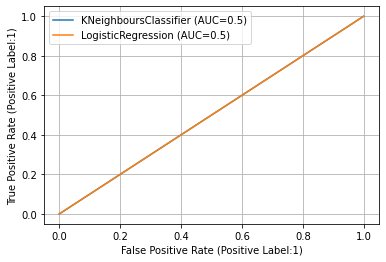

In [1]:
#### Import the required libraries
import pandas as pd  #to import the dataset 
from sklearn.model_selection import train_test_split  # to split the dataset
from sklearn.neighbors import KNeighborsClassifier   # for KNN classification
from sklearn.linear_model import LogisticRegression  #for Logistic Regression
from sklearn import metrics                         #to calcualte the results of the prediction
from sklearn.metrics import RocCurveDisplay
from matplotlib import pyplot as plt              # to plot the ROC curves
plt.rcParams['figure.figsize'] = [14, 10]


# Import the dataset
df = pd.read_csv('dataset.csv')
#step 1
# Separate the features and the output 'Prediction'
# Lets say X is the feature matrix and y is the prediction

X = df.iloc[:,1:9]   
# We dont need the first column 'Email No.' as this is just for indexing and doesn't carry any meaningful feature

# Now separate the predictions
y = df.iloc[:,-1]

#Step 2
# Now split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#Training set will contain 70% of the data and test set 30%  of the total data.

#Step 3
# define a KNN classisifier and train the model test the model
KNN = KNeighborsClassifier(n_neighbors=5)
#fit the training data to the model
KNN.fit(X_train, y_train)
# Make predicitions using test data
yPreds_KNN = KNN.predict(X_test)


#Step 4
#Define a logistic regression classifier to train the data
LRC = LogisticRegression(random_state=0)
#fit the training data
LRC.fit(X_train, y_train)
#make predicitions 
yPreds_LRC = LRC.predict(X_test)

#Step 5
#Compare the predicted result with actual prediction x_test and get the ROC curve

# find the false positive rate and true positive rate from the predictions for KNN model
fpr, tpr, _ = metrics.roc_curve(y_test, yPreds_KNN)
#find the area under the curve
auc = round(metrics.roc_auc_score(y_test, yPreds_KNN),4)

#Plot the result in a matplolib plot
plt.plot(fpr,tpr,label="KNeighboursClassifier (AUC="+str(auc)+")")


#repeat the same steps for Logistic regression.
fpr, tpr, _ = metrics.roc_curve(y_test, yPreds_LRC)
auc = round(metrics.roc_auc_score(y_test, yPreds_LRC), 4)
plt.plot(fpr,tpr,label="LogisticRegression (AUC="+str(auc)+")")


#add legend
plt.legend()

#add grids
plt.grid()

#add axis labels
plt.xlabel('False Positive Rate (Positive Label:1)')
plt.ylabel('True Positive Rate (Positive Label:1)')

#show the plot
plt.show()

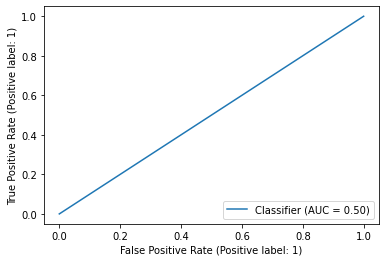

In [2]:
#NOw, lets plot a ROC curve.
RocCurveDisplay.from_predictions(y_test, yPreds_KNN)

In [4]:
#Here is a look of sample data taken for this problem
df = pd.read_csv('dataset.csv')
df.head()

,Email No,the,to,ect,and,for,of,a,you,Prediction
0,Email 1,0,0,1,0,1,0,6,0,0
1,Email 2,6,5,1,3,2,3,38,3,1
2,Email 3,0,0,1,0,0,0,8,0,0
3,Email 4,0,1,2,0,1,0,9,0,0
4,Email 5,0,0,1,0,1,0,4,0,0
